<center><h1>Titanic data set: Exploratory data analysis</h1></center>

<div>In this notebook we perform an exploratory data analysis on the Titanic dataset from Kaggle. The overall aim is to successfully predict whether a given passenger would survive the sinking of the ship or not. Here we will determine what features might be useful to our model and produce a table of these features in a form that can be used by the model, outputting the table to be used in a further notebook.</div>

<h2>Loading and checking out the data</h2>

First we import the usual ....

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

and read the data into data frames

In [2]:
df_train = pd.read_csv("train.csv")
df_test  = pd.read_csv("test.csv")

We make a single data frame from the data: easier to replace empty data etc.

In [3]:
#first store the labels (passenger survived = 1, passenger did not = 0)
labels = df_train.Survived
df_train.drop('Survived', 1, inplace=True)

#store the lengths of each data frame
n_train = df_train.shape[0]
n_test = df_test.shape[0]

#and make a combined data set
data = df_train.append(df_test, ignore_index=True)

We take a quick look at the data ...

In [4]:
print(data.head())

   PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S  
1  female  38.0      1      0          PC 17599  71.2833   C85        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3  female  35.0      1      0            113803  53.1000  C123        S  
4    male  35.0      0      0            373450   8.0500   NaN        S  


The data has the following columns

 - PassengerId: the unique number given in the table to each passenger
 - Pclass: cabin class the passenger was in (1st, 2nd or 3rd)
 - Name: self-evident
 - Sex: self-evident
 - Age: self-evident
 - SibSp: number of siblings/spouses on board
 - Parch: parents/children on board
 - Ticket: the ticket number of the passenger
 - Fare: amount paid by the passenger
 - Cabin: the cabin number of the passenger, with the letter giving the level
 - Embarked: location where the passenger boarded (C = Cherbourg, Q = Queenstown or S = Southampton)

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB
None


Fare has one NaN, Cabin has two. 
These should be easy enough to replace.

Age has a quite a few NaNs, Cabin has a lot. Perhaps we can replace these.

In [6]:
print(data.describe())

       PassengerId       Pclass          Age        SibSp        Parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean    655.000000     2.294882    29.881138     0.498854     0.385027   
std     378.020061     0.837836    14.413493     1.041658     0.865560   
min       1.000000     1.000000     0.170000     0.000000     0.000000   
25%     328.000000     2.000000    21.000000     0.000000     0.000000   
50%     655.000000     3.000000    28.000000     0.000000     0.000000   
75%     982.000000     3.000000    39.000000     1.000000     0.000000   
max    1309.000000     3.000000    80.000000     8.000000     9.000000   

              Fare  
count  1308.000000  
mean     33.295479  
std      51.758668  
min       0.000000  
25%       7.895800  
50%      14.454200  
75%      31.275000  
max     512.329200  


and describe doesn't really tell us much .....

<h2>Feature selection</h2>

Now let's determine the features. 

First we will make a function to cross tabulate two columns (e.g. a feature with Survived), with the regular crosstab output and the output as a fraction of those who survived returned.

In [7]:
def cross_tab_frac(df1, col, df2):
    """crosstabulate two columns of data, with output both regular and as fractions"""
    #cross tabulate df1 with df2
    print(pd.crosstab(df1[col], df2, margins=True))
    print("")
    print("")
    #make a dataframe of this as fractions
    ct_frac = pd.crosstab(df1[col], df2).apply(lambda r: r/r.sum(), axis=1).sort_values(1, ascending=False)
    #and print it
    print(ct_frac)
    #and plot it
    ind = np.arange(len(ct_frac[1]))
    width = 1.0
    fig = plt.figure(figsize=(4,3))
    plt.bar(ind, ct_frac[1], width)
    plt.xlabel(col, labelpad=20)
    plt.ylabel("Fraction who survived")
    plt.ylim((0,1))
    plt.xticks(ind + width / 2, ct_frac.index, rotation=90)
    plt.margins(0.02)
    plt.title("Fraction of passangers who survived, grouped by "+col, y=1.08)
    plt.show()
    return

Pclass is probably a good feature, rich people are more likely to survive. We cross tabulate Pclass with Survived

Survived    0    1  All
Pclass                 
1          80  136  216
2          97   87  184
3         372  119  491
All       549  342  891


Survived         0         1
Pclass                      
1         0.370370  0.629630
2         0.527174  0.472826
3         0.757637  0.242363


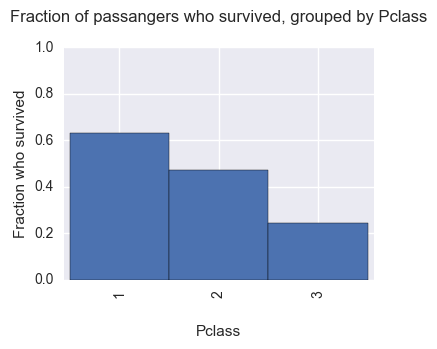

In [8]:
cross_tab_frac(data.iloc[0:n_train,:], "Pclass", labels)

Clearly, a higher fraction of first class passengers survived (about 2/3), then second (about 1/2) then third (about 1/4). This would make a good feature, and as it is already numeric we can leave it as it is.

Now let's check Sex.

Survived    0    1  All
Sex                    
female     81  233  314
male      468  109  577
All       549  342  891


Survived         0         1
Sex                         
female    0.257962  0.742038
male      0.811092  0.188908


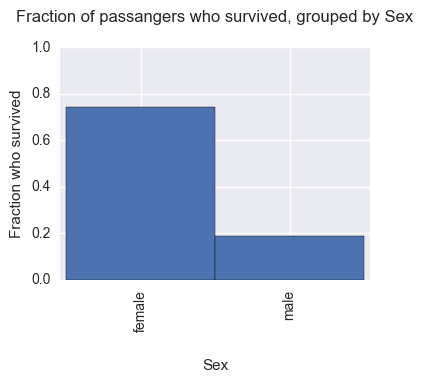

In [9]:
cross_tab_frac(data.iloc[0:n_train,:], "Sex", labels)

Women have a MUCH higher chance of surviving. We'll make this into a feature by turning the strings into numeric values.

We now define a function that takes a column, sorts the entries by survival rates, and then changes the strings to integers in this sorted order. (If we are specifically interested in which number corresponds to which string, we will have to change this later, but for the task here, it shouldn't matter).

In [10]:
def make_str_ints(df1, col, df2):
    """Turn features which have string entries into integer entries"""
    ct_frac = pd.crosstab(df1.ix[0:df2.shape[0],col], df2).apply(lambda r: r/r.sum(), axis=1).sort_values(1, ascending=True)
    labels = ct_frac.index.tolist() # df[col].value_counts().index.tolist()
    df1[col] = df1[col].replace(labels, range(0,len(labels)))
    return df1

In [11]:
data = make_str_ints(data,'Sex', labels)
print(data.head())

   PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

   Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0    0  22.0      1      0         A/5 21171   7.2500   NaN        S  
1    1  38.0      1      0          PC 17599  71.2833   C85        C  
2    1  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3    1  35.0      1      0            113803  53.1000  C123        S  
4    0  35.0      0      0            373450   8.0500   NaN        S  


//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()


Embarkation location could also help (maybe as a proxy for the cabin they ended up in, with some sides of the boat or some levels having a higher chance of surviving etc.)

Survived    0    1  All
Embarked               
C          75   93  168
Q          47   30   77
S         427  217  644
All       549  340  889


Survived         0         1
Embarked                    
C         0.446429  0.553571
Q         0.610390  0.389610
S         0.663043  0.336957


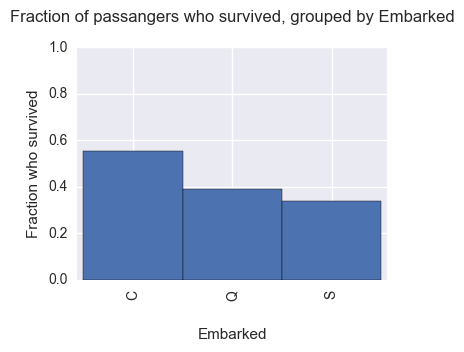

In [12]:
cross_tab_frac(data.iloc[0:n_train, :], "Embarked", labels)

Cherbourg was a good place to board, the others less so. The difference is small, but we will leave it in, and convert the string values to integers as before

In [13]:
data = make_str_ints(data,'Embarked', labels)
print(data.head())

   PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

   Sex   Age  SibSp  Parch            Ticket     Fare Cabin  Embarked  
0    0  22.0      1      0         A/5 21171   7.2500   NaN       0.0  
1    1  38.0      1      0          PC 17599  71.2833   C85       2.0  
2    1  26.0      0      0  STON/O2. 3101282   7.9250   NaN       0.0  
3    1  35.0      1      0            113803  53.1000  C123       0.0  
4    0  35.0      0      0            373450   8.0500   NaN       0.0  


Let's now consider whether someone had their family with them or not: SibSp (siblings / spouses) and Parch (parents / kids).

We now cross tabulate SibSp, Parch and SibSp+Parch (i.e. total family size) with Survived

sibsp with survival
Survived    0    1  All
SibSp                  
0         398  210  608
1          97  112  209
2          15   13   28
3          12    4   16
4          15    3   18
5           5    0    5
8           7    0    7
All       549  342  891


Survived         0         1
SibSp                       
1         0.464115  0.535885
2         0.535714  0.464286
0         0.654605  0.345395
3         0.750000  0.250000
4         0.833333  0.166667
5         1.000000  0.000000
8         1.000000  0.000000


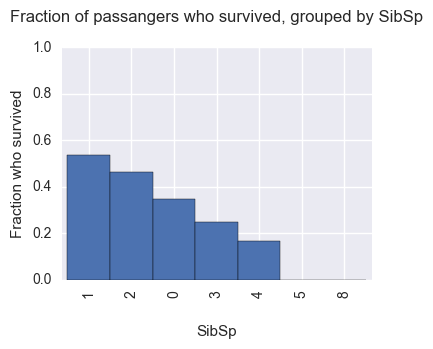


parch with survival
Survived    0    1  All
Parch                  
0         445  233  678
1          53   65  118
2          40   40   80
3           2    3    5
4           4    0    4
5           4    1    5
6           1    0    1
All       549  342  891


Survived         0         1
Parch                       
3         0.400000  0.600000
1         0.449153  0.550847
2         0.500000  0.500000
0         0.656342  0.343658
5         0.800000  0.200000
4         1.000000  0.000000
6         1.000000  0.000000


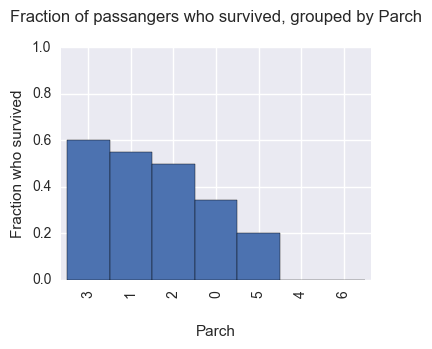


parch + sibsp with survival
Survived         0    1  All
SibSp + Parch               
0              374  163  537
1               72   89  161
2               43   59  102
3                8   21   29
4               12    3   15
5               19    3   22
6                8    4   12
7                6    0    6
10               7    0    7
All            549  342  891


Survived              0         1
SibSp + Parch                    
3              0.275862  0.724138
2              0.421569  0.578431
1              0.447205  0.552795
6              0.666667  0.333333
0              0.696462  0.303538
4              0.800000  0.200000
5              0.863636  0.136364
7              1.000000  0.000000
10             1.000000  0.000000


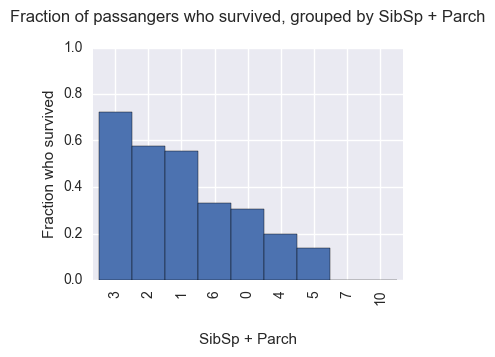

In [14]:
#cross tabulate sibsp with survival
print("sibsp with survival")
cross_tab_frac(data.iloc[0:n_train], "SibSp", labels)
print("")
#cross tabulate Parch with survival
print("parch with survival")
cross_tab_frac(data.iloc[0:n_train],"Parch", labels)
print("")
#cross tabulate sibsp+Parch with survival
print("parch + sibsp with survival")
data_tmp = pd.DataFrame(data.iloc[0:n_train].SibSp + data.iloc[0:n_train].Parch, columns=["SibSp + Parch"])
cross_tab_frac(data_tmp.iloc[0:n_train], "SibSp + Parch", labels)

There appears to be some effect, but there is not much data for the larger values. It is also a bit strange that 7 people have 10 family members with them. Surely 10 should? Inomplete or incorrect data, perhaps.


In general:
    
- mid range values (1-3, a small family) seem to improve the chances of survival (to > 50%).

- large values (4+, a large family) seem to decrease the chances of survival (with 6 as something of an outlier, although there is not much data there, so the errors will be large).

- 0 (a single person) also seems to decrease the chances of survival (although not as bad as being part of a large family).

Therefore, we will make this into a catagorical feature, with singleton, small family and large family as the catagories.

In [15]:
def make_fam_type(df, cuts):
    """Add up the family size and set it into three different types"""
    #cuts controls the boundaries
    df['Fam_size']  = df['SibSp']  + df['Parch']
    df['Fam_type']  = 'Small_family'
    df.loc[(df['Fam_size'] < cuts[0]), 'Fam_type'] = 'Singleton'
    df.loc[(df['Fam_size'] > cuts[1]), 'Fam_type'] = 'Large_family'
    return df

In [16]:
#we set the boundaries to 1 and 3
cuts = (1, 3)
data = make_fam_type(data, cuts)
data = make_str_ints(data,'Fam_type', labels)
print(data.head())

   PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

   Sex   Age  SibSp  Parch            Ticket     Fare Cabin  Embarked  \
0    0  22.0      1      0         A/5 21171   7.2500   NaN       0.0   
1    1  38.0      1      0          PC 17599  71.2833   C85       2.0   
2    1  26.0      0      0  STON/O2. 3101282   7.9250   NaN       0.0   
3    1  35.0      1      0            113803  53.1000  C123       0.0   
4    0  35.0      0      0            373450   8.0500   NaN       0.0   

   Fam_size  Fam_type  
0         1         2  
1         1         2  
2         0         1  
3 

Survived    0    1  All
Fam_type               
0          52   10   62
1         374  163  537
2         123  169  292
All       549  342  891


Survived         0         1
Fam_type                    
2         0.421233  0.578767
1         0.696462  0.303538
0         0.838710  0.161290


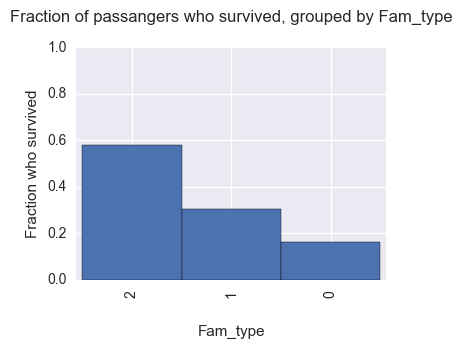

In [17]:
#cross tabulate family type with survival
cross_tab_frac(data.iloc[0:n_train], "Fam_type", labels)

We can get some information from the passanger name:

1) Their title. This will have information on sex (Mr, Mrs etc.), age (Mr, Master) and class (Sir, Lord etc.).

2) The length of the name. Longer names might indicate upper class. Crude, but let's try it.

First we write a function to extract the titles:

In [18]:
def extract_titles(df):
    """Extract the title of the passenger and make it into a column"""
    df['Title'] = df.Name.str.split(", ").str[1]
    df['Title'] = df.Title.str.split(".").str[0]
    #remove the 'the '
    df.Title = df.Title.map(lambda x: x.lstrip('the '))
    return df

In [19]:
data = extract_titles(data)

And we cross tabulate the title with survival

Survived    0    1  All
Title                  
Capt        1    0    1
Col         1    1    2
Countess    0    1    1
Don         1    0    1
Dr          4    3    7
Jonkheer    1    0    1
Lady        0    1    1
Major       1    1    2
Master     17   23   40
Miss       55  127  182
Mlle        0    2    2
Mme         0    1    1
Mr        436   81  517
Mrs        26   99  125
Ms          0    1    1
Rev         6    0    6
Sir         0    1    1
All       549  342  891


Survived         0         1
Title                       
Sir       0.000000  1.000000
Countess  0.000000  1.000000
Ms        0.000000  1.000000
Mme       0.000000  1.000000
Lady      0.000000  1.000000
Mlle      0.000000  1.000000
Mrs       0.208000  0.792000
Miss      0.302198  0.697802
Master    0.425000  0.575000
Col       0.500000  0.500000
Major     0.500000  0.500000
Dr        0.571429  0.428571
Mr        0.843327  0.156673
Jonkheer  1.000000  0.000000
Don       1.000000  0.000000
Rev       1.000000  0.000

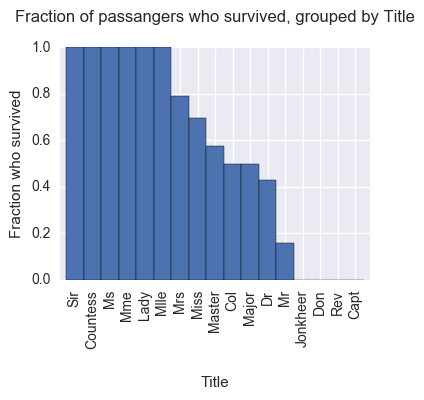

In [20]:
cross_tab_frac(data.iloc[0:n_train,:], "Title", labels)

Some titles mean the same thing (Mrs and Mme, or Miss and Mlle), some don't have much data (just one Jonkheer etc.), so we will combine them

We make the following catagories
- Mr
- Master
- Mrs      (also Mme)
- Miss     (also Ms, Mlle)
- Military (Col, Major, Capt)
- Rev 
- Dr 
- Aristocracy Female (Countess, Lady, Dona)
- Aristocracy Male   (Don, Jonkheer, Sir)

In [21]:
def combine_titles(df, titles_combine):
    """Extract the title of the passenger and make it into features"""
    #make the array of titles that are to be combined.
    for key, values in titles_combine.items():
        df.ix[df.Title.isin(values), 'Title'] = key
    return df

In [22]:
#make the array of titles that are to be combined.
titles_combine = {}
titles_combine['Mrs'] = ['Mrs', 'Mme']
titles_combine['Miss']     = ['Miss', 'Ms', 'Mlle']
titles_combine['Military'] = ['Col', 'Major', 'Capt']
titles_combine['Arist_F']  = ['Lady', 'Countess', 'Dona']
titles_combine['Arist_M']  = ['Sir', 'Jonkheer', 'Don']
data = combine_titles(data, titles_combine)
#see the counts for each type
print(data.Title.unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Arist_M' 'Rev' 'Dr' 'Military' 'Arist_F']


Survived    0    1  All
Title                  
Arist_F     0    2    2
Arist_M     2    1    3
Dr          4    3    7
Master     17   23   40
Military    3    2    5
Miss       55  130  185
Mr        436   81  517
Mrs        26  100  126
Rev         6    0    6
All       549  342  891


Survived         0         1
Title                       
Arist_F   0.000000  1.000000
Mrs       0.206349  0.793651
Miss      0.297297  0.702703
Master    0.425000  0.575000
Dr        0.571429  0.428571
Military  0.600000  0.400000
Arist_M   0.666667  0.333333
Mr        0.843327  0.156673
Rev       1.000000  0.000000


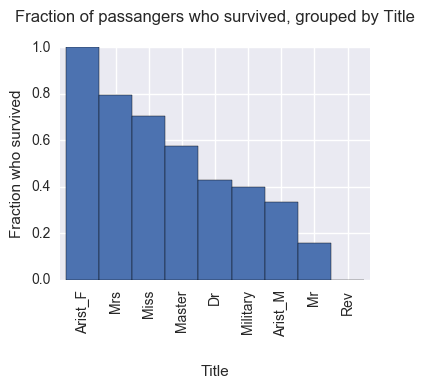

In [23]:
#cross tabulate the title with survival
cross_tab_frac(data.iloc[0:n_train,:], "Title", labels)

Seems like doctors, military men and male aristocrats can also be combined: there is not much data for them all, and the values are very close, plus they would have been quite similar (presumably well-to-do males of a certain age).

There are also not many reverands or female aristocrats, but these are very likely to die or survive (respectivley), which also makes sense.

In [24]:
#make the array of titles that are to be combined.
titles_combine = {}
titles_combine['Titled_males']  = ['Arist_M', 'Dr', 'Military']
data = combine_titles(data, titles_combine)
#see the counts for each type
print(data.Title.unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Titled_males' 'Rev' 'Arist_F']


Survived        0    1  All
Title                      
Arist_F         0    2    2
Master         17   23   40
Miss           55  130  185
Mr            436   81  517
Mrs            26  100  126
Rev             6    0    6
Titled_males    9    6   15
All           549  342  891


Survived             0         1
Title                           
Arist_F       0.000000  1.000000
Mrs           0.206349  0.793651
Miss          0.297297  0.702703
Master        0.425000  0.575000
Titled_males  0.600000  0.400000
Mr            0.843327  0.156673
Rev           1.000000  0.000000


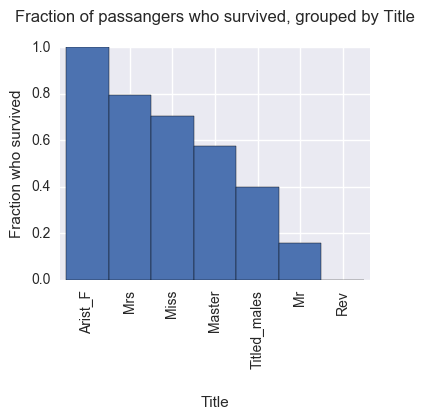

In [25]:
#cross tabulate the title with survival
cross_tab_frac(data.iloc[0:n_train,:], "Title", labels)

And make these titles into features

In [26]:
data = make_str_ints(data,'Title', labels)
print(data.head())

   PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

   Sex   Age  SibSp  Parch            Ticket     Fare Cabin  Embarked  \
0    0  22.0      1      0         A/5 21171   7.2500   NaN       0.0   
1    1  38.0      1      0          PC 17599  71.2833   C85       2.0   
2    1  26.0      0      0  STON/O2. 3101282   7.9250   NaN       0.0   
3    1  35.0      1      0            113803  53.1000  C123       0.0   
4    0  35.0      0      0            373450   8.0500   NaN       0.0   

   Fam_size  Fam_type  Title  
0         1         2      1  
1         1         2      5  
2    

There seems to be some useful information in the title. This is likely linked to age, sex and class (e.g. women and particularly female nobility are more likely to survive, older men (Mr) and also Reverands are less likely

Now for the length of the passenger name. We will be crude and keep the title in

In [27]:
data['Name_len'] = data.Name.str.len()
print(data["Name_len"].min(), data["Name_len"].max())

12 82


12 is the minimum length, 82 is the longest

Let's see if certain name lengths increase the chance of survival

We'll write a funciton to show the fraction who survive for certain bins

In [28]:
def plot_hist_frac(df1, col, df2, bins):
    #first make the data
    data_tmp = pd.concat([df1.loc[0:n_train-1],df2],axis=1)
    x = data_tmp[df2==0] # data for died
    y = data_tmp[df2==1] # data for survived
    #make a bar chart showing the fraction who survived and died
    xhist, xbins = np.histogram(x[col].values, bins=bins)
    yhist, ybins = np.histogram(y[col].values, bins=bins)
    tot = xhist+yhist
    xhist = xhist/tot
    yhist = yhist/tot
    #make the index labels and the width
    ind = bins[:-1]
    width = (bins[1:] - bins[:-1])
    #plot the figure: fraction who survived
    fig = plt.figure(figsize=(10,3))
    plt.subplot(1, 2, 1)
    plt.bar(ind, yhist, width)
    plt.xlabel(col)
    plt.ylabel("Fraction who survived")
    plt.ylim((0,1))
    plt.xlim((bins[0],bins[-1]))
    plt.xticks(ind+width/2, ind+width/2, rotation='vertical')
    plt.margins(0.02)
    plt.title("Fraction who survived, grouped by "+col, y=1.08)
    #and the total number of passengers in each bin
    plt.subplot(1, 2, 2)
    plt.bar(ind, tot, width)
    plt.xlabel(col)
    plt.ylabel("Number")
    plt.xlim((bins[0],bins[-1]))
    plt.xticks(ind+width/2, ind+width/2, rotation='vertical')
    plt.margins(0.02)
    plt.title("Number of passangers, grouped by "+col, y=1.08)
    #show the plot
    plt.show()

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in true_divide
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in true_divide


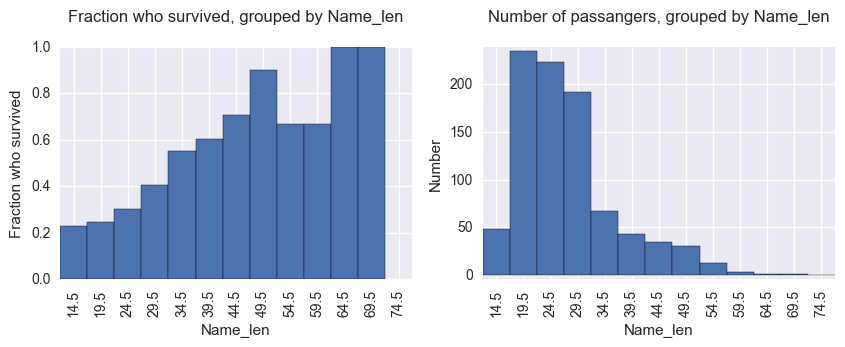

In [29]:
#make bins
n_min = data["Name_len"].min()
n_max = data["Name_len"].max()
n_dif = 5
bins = np.arange(n_min,n_max,n_dif)
#plot
plot_hist_frac(data.iloc[0:n_train,:], "Name_len", labels, bins)

This seems to show that longer names are better for survival (again linked to class?), with a low chance of survival for names shorter than about 27 characters, and a sharp increas after 32. It gets better beyond that, but there is so little data, that it probably isn't very reliable

Lets see how this looks using the ranges mentioned above as bins

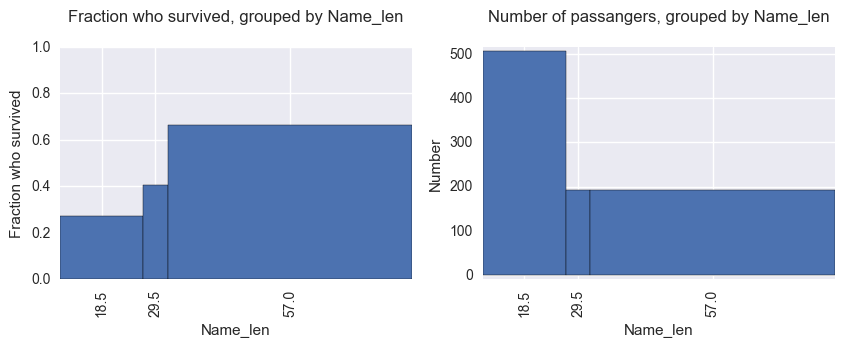

In [30]:
bins = np.array([10, 27, 32, 82])
#plot
plot_hist_frac(data.iloc[0:n_train,:], "Name_len", labels, bins)

We will make three catagories, (short, medium and long) with < 27 short, and > 32 being long

In [31]:
def make_name_cat(df, bins, labels):
    """function to make the lengths of the names into catagories"""
    df['Name_cat'] = pd.cut(df['Name_len'], bins, labels=labels).astype(str)
    return df

In [32]:
#make the bins
bins = (10, 27, 32, 82)
#make the labels
name_labels = ['Short', 'Medium', 'Long']
#make the column
data =  make_name_cat(data, bins, name_labels)
print(data.head())

   PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

   Sex   Age  SibSp  Parch            Ticket     Fare Cabin  Embarked  \
0    0  22.0      1      0         A/5 21171   7.2500   NaN       0.0   
1    1  38.0      1      0          PC 17599  71.2833   C85       2.0   
2    1  26.0      0      0  STON/O2. 3101282   7.9250   NaN       0.0   
3    1  35.0      1      0            113803  53.1000  C123       0.0   
4    0  35.0      0      0            373450   8.0500   NaN       0.0   

   Fam_size  Fam_type  Title  Name_len Name_cat  
0         1         2      1        23    Short 

And cross tabulate Name_cat with survival

Survived    0    1  All
Name_cat               
Long       55  114  169
Medium     92   73  165
Short     402  155  557
All       549  342  891


Survived         0         1
Name_cat                    
Long      0.325444  0.674556
Medium    0.557576  0.442424
Short     0.721724  0.278276


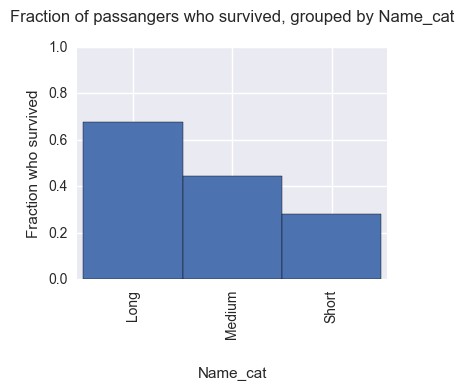

In [33]:
cross_tab_frac(data.iloc[0:n_train], "Name_cat", labels)

We now have three catagories, each with distinctly different suvival rates

Now change the strings to integers

In [34]:
data = make_str_ints(data,'Name_cat', labels)
print(data.head())

   PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

   Sex   Age  SibSp  Parch            Ticket     Fare Cabin  Embarked  \
0    0  22.0      1      0         A/5 21171   7.2500   NaN       0.0   
1    1  38.0      1      0          PC 17599  71.2833   C85       2.0   
2    1  26.0      0      0  STON/O2. 3101282   7.9250   NaN       0.0   
3    1  35.0      1      0            113803  53.1000  C123       0.0   
4    0  35.0      0      0            373450   8.0500   NaN       0.0   

   Fam_size  Fam_type  Title  Name_len  Name_cat  
0         1         2      1        23         

We now have the following features we could use:

 - Sex
 - Pclass
 - Embarked
 - SibSp, Parch and Fam_type/size (we will probably drop SibSp, Parch and Size)
 - Title
 - Name_cat/length (we will probably drop Name_len)
 


<h2>Filling in missing data</h2>

We have a single missing fare, so we will start with that.

First print it out

In [35]:
print(data[data["Fare"].isnull()])

      PassengerId  Pclass                Name  Sex   Age  SibSp  Parch Ticket  \
1043         1044       3  Storey, Mr. Thomas    0  60.5      0      0   3701   

      Fare Cabin  Embarked  Fam_size  Fam_type  Title  Name_len  Name_cat  
1043   NaN   NaN       0.0         0         1      1        18         0  


This is a single male in 3rd class, title is Mr, got on in Southampton

Let's replace this with the median fare for a single male passenger with title Mr in 3rd class who got on in Southampton

In [36]:
data.loc[data["Fare"].isnull(),"Fare"] = data[(data["Fare"].notnull()) & (data["Sex"] == 0) & 
                                              (data["Embarked"] == 0.0) & (data["Pclass"] == 3) & 
                                              (data['Fam_size'] == 0) & (data["Title"] == 1)]["Fare"].median()
#and print the resulting info out
print(data.iloc[1043])

PassengerId                  1044
Pclass                          3
Name           Storey, Mr. Thomas
Sex                             0
Age                          60.5
SibSp                           0
Parch                           0
Ticket                       3701
Fare                       7.8958
Cabin                         NaN
Embarked                        0
Fam_size                        0
Fam_type                        1
Title                           1
Name_len                       18
Name_cat                        0
Name: 1043, dtype: object


Now we move on to the two missing embarkations ...

In [37]:
print(data[data["Embarked"].isnull()])

     PassengerId  Pclass                                       Name  Sex  \
61            62       1                        Icard, Miss. Amelie    1   
829          830       1  Stone, Mrs. George Nelson (Martha Evelyn)    1   

      Age  SibSp  Parch  Ticket  Fare Cabin  Embarked  Fam_size  Fam_type  \
61   38.0      0      0  113572  80.0   B28       NaN         0         1   
829  62.0      0      0  113572  80.0   B28       NaN         0         1   

     Title  Name_len  Name_cat  
61       4        19         0  
829      5        41         2  


It is for two females, in the same 1st class cabin (B28).

The fare may have been different depending on where people embarked. We'll make a boxplot of the fares that passengers in first class paid, sorted by embarkation point, and one more showing this limited to females in first class. In addition, we will make a similar plot, only now we will limit it to passengers on B deck (cabin begins with B).

0.0    177
2.0    141
1.0      3
Name: Embarked, dtype: int64
2.0    71
0.0    69
1.0     2
Name: Embarked, dtype: int64
2.0    32
0.0    31
Name: Embarked, dtype: int64


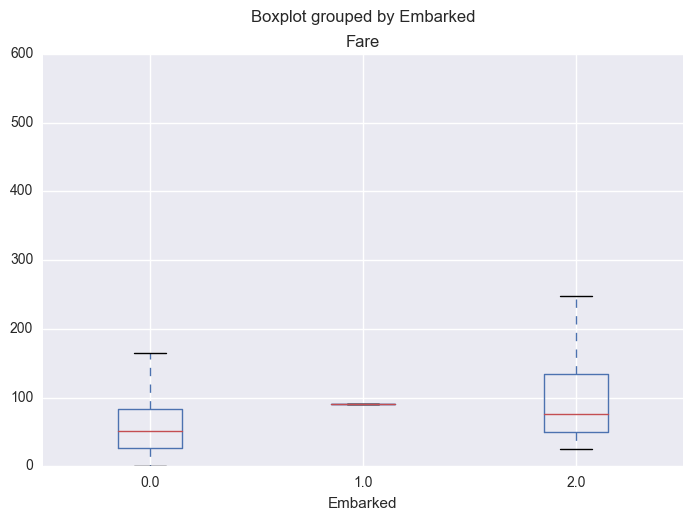

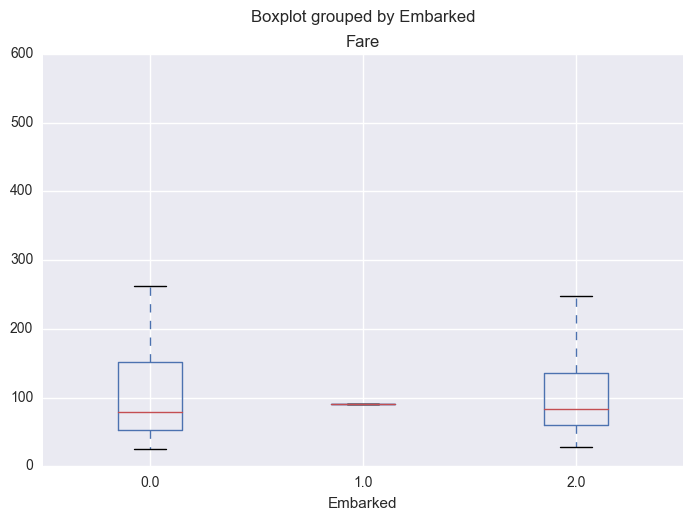

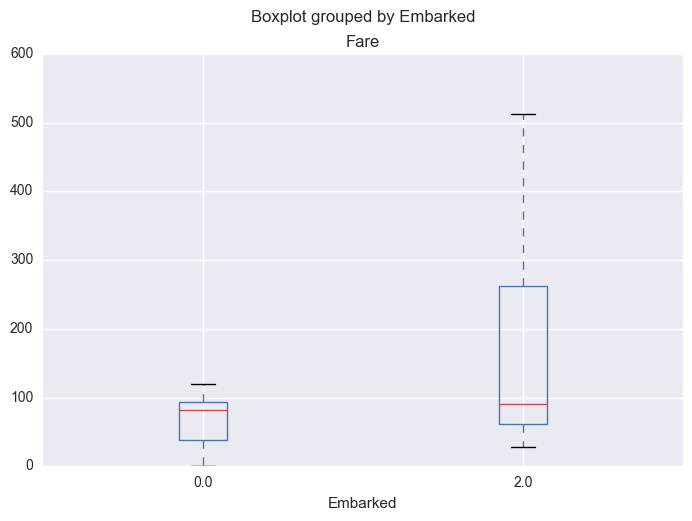

In [38]:
#See how many passengers got on at each location in 1st class
print(data[(data.Pclass == 1)]["Embarked"].value_counts())
#See how many female passengers got on at each location in 1st class
print(data[(data.Pclass == 1) & (data.Sex == 1)]["Embarked"].value_counts())
#See how many passengers got on at each location in cabins on B-deck
print(data[data.Cabin.str.contains("B").fillna(False)]["Embarked"].value_counts())

#and make a box plot showing the fare paid for each of the above conditions
data[(data.Pclass == 1)].boxplot(column="Fare", by="Embarked", grid=True)
data[(data.Pclass == 1) & (data.Sex == 1)].boxplot(column="Fare", by="Embarked", grid=True)
data[data.Cabin.str.contains("B").fillna(False)].boxplot(column="Fare", by="Embarked", grid=True)
plt.show()

Not many first class passengers got on in Embarked = 1 (Queensferry), the other two points of embarkation have similar numbers.

In terms of the fares they paid, it is difficult to tell ...

but since the number of passengers getting on at both Southampton and Cherbourg are very close, and the fares for first class passengers tend closer to 80 (the values for our missing passengers) for 2 (Cherbourg), we will use that

In [39]:
data["Embarked"] = data["Embarked"].fillna(2)

Survived    0    1  All
Embarked               
0.0       427  217  644
1.0        47   30   77
2.0        75   95  170
All       549  342  891


Survived         0         1
Embarked                    
2.0       0.441176  0.558824
1.0       0.610390  0.389610
0.0       0.663043  0.336957


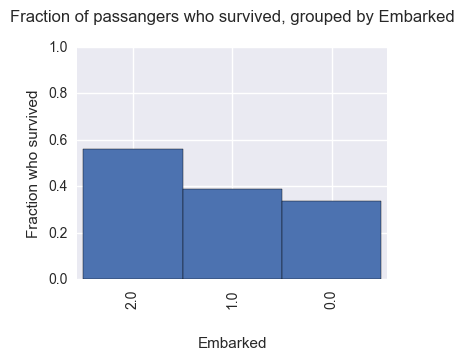

In [40]:
cross_tab_frac(data.iloc[0:n_train, :], "Embarked", labels)

Now lets try to replace the missing ages, which have quite a few more missing values.

We will try using the random forest to learn on the data we have with ages, and then set the missing ages accordingly. 

We need to decide on features to use

In [41]:
#see what catagories we have
print(data.columns)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Fam_size', 'Fam_type', 'Title',
       'Name_len', 'Name_cat'],
      dtype='object')


Good features for age might be:
- Title
- SibSp
- Parch
- Pclass
- Fare
- Name_cat

with title probably being the most important. Let's take a look at the distribution of ages for these, using bee-swarm plots

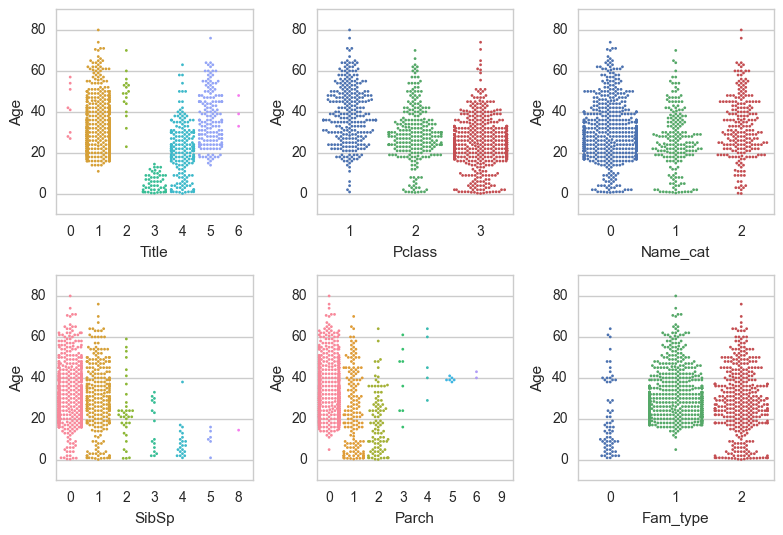

In [42]:
sns.set_style("whitegrid")
plt.figure(figsize=(7,7))
fig, axs = plt.subplots(ncols=3, nrows=2)

sns.swarmplot(x='Title', y='Age', data=data, ax=axs[0,0], size=2)
sns.swarmplot(x='Pclass', y='Age', data=data, ax=axs[0,1], size=2)
sns.swarmplot(x='Name_cat',y='Age', data=data, ax=axs[0,2], size=2)

sns.swarmplot(x='SibSp', y='Age', data=data, ax=axs[1,0], size=2)
sns.swarmplot(x='Parch', y='Age', data=data, ax=axs[1,1], size=2)
sns.swarmplot(x='Fam_type',y='Age', data=data, ax=axs[1,2], size=2)
plt.tight_layout()
#_ = sns.swarmplot(x="Title", y="Age", data=data)
plt.show()

Age seems to show some dependence on these. Let's also take a look age against fare.

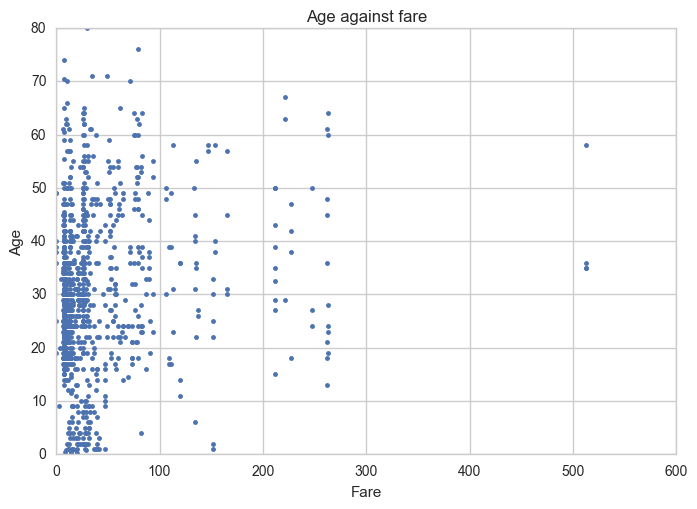

In [43]:
plt.plot(data.Fare, data.Age, linestyle='None', marker = '.')
plt.title("Age against fare")
plt.xlabel("Fare")
plt.ylabel("Age")
plt.show()

Low fares give no indication about the age, while high fares appear to indicate a somewhat older crowd. Since we are using a Random Forest regressor, we can leave this in and see how useful it is

Now let's try to fit a model to our data and predict the ages. First we write a function to fit the model and make the predicitons.

As this is a prectice exercise, we won't go into too much detail about how we optimize the model (i.e. we minimize the error in the predictions by playing with the hyperparameters).

In [44]:
def calc_age(df, model, features, n_splits = 5):
    """Use model to predict the ages of the passengers using features"""
    from sklearn.model_selection import train_test_split
    from sklearn import preprocessing
    from sklearn.model_selection import KFold
    df['Age_guess'] = 0.0
    df_train = df.loc[df['Age'].notnull()]
    df_test  = df.loc[df['Age'].isnull()]
    train_features = df_train[features].values.reshape(-1,len(features))
    train_label    = df_train.Age.values.reshape(-1,)
    test_features =  df_test[features].values.reshape(-1,len(features))
    kf = KFold(n_splits=n_splits)
    i = 0
    mean_sum = 0.0
    error_sum = 0.0
    for train_index, test_index in kf.split(train_features):
        i+=1
        X_train, X_test = train_features[train_index,:], train_features[test_index,:]
        y_train, y_test = train_label[train_index], train_label[test_index]
        scaler = preprocessing.StandardScaler().fit(X_train)
        X_train_transformed = scaler.transform(X_train)
        X_test_transformed = scaler.transform(X_test)
        test_features_transformed = scaler.transform(test_features)
        model.fit(X_train_transformed, y_train)
        #now find the accuracy on the test set
        diff = (np.absolute(y_test - model.predict(X_test_transformed).reshape((y_test.shape[0],))))
       # print('Stats for difference between predicted and actual ages: loop ', i)
      #  print('error:  ', 0.5*np.sum(diff*diff)/diff.shape[0])
        mean_sum += np.mean(diff)
        error_sum += 0.5*np.sum(diff*diff)/diff.shape[0]
        print('mean:   ', i, np.mean(diff), 0.5*np.sum(diff*diff)/diff.shape[0])
       # print('median: ', np.median(diff))
        #print('std:    ', np.std(diff))
       # print('')
        age_predict = model.predict(test_features_transformed)
        df.loc[ (df.Age.isnull()), 'Age_guess' ] += age_predict
        df.loc[ (df.Age.notnull()), 'Age_guess' ] += df_train['Age']
    print('final mean:', mean_sum/n_splits, error_sum/n_splits)
    df['Age_guess'] /= n_splits
    return df

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
features = ['Fare', 'SibSp', 'Parch', 'Pclass',
       'Fam_type', 'Title', 'Name_cat']
#rfr = RandomForestRegressor(n_estimators=500, max_depth=500, min_samples_split = 12, min_samples_leaf=5,max_features=2)
lr = LinearRegression()
rfr = RandomForestRegressor(n_estimators=500, max_depth=500)
gbr = GradientBoostingRegressor(n_estimators=500, max_depth=3)
data=calc_age(data, lr, features, n_splits=10)
print('')
data=calc_age(data, rfr, features, n_splits=10)
print('')
data=calc_age(data, gbr, features, n_splits=10)


mean:    1 9.5928134882 80.2681747939
mean:    2 10.1229039087 76.6263086749
mean:    3 9.48932485095 80.1379823416
mean:    4 9.80208486805 79.8651415184
mean:    5 10.3598420125 78.7174475128
mean:    6 11.0519703792 94.3145900869
mean:    7 9.92998104296 83.4898890882
mean:    8 9.0671864446 75.1952045799
mean:    9 9.85090299301 76.1652343365
mean:    10 9.93134880933 72.4240077364
final mean: 9.91983587975 79.7203980669

mean:    1 8.46851999708 68.5036206908
mean:    2 7.78665158437 49.603928755
mean:    3 8.13501012386 53.8605402095
mean:    4 9.24384584112 69.2273453848
mean:    5 8.91441364112 68.892602229
mean:    6 9.89956166584 81.1527247063
mean:    7 9.38672387225 78.5811892528
mean:    8 8.7658111729 72.8860543189
mean:    9 8.24098098071 59.5780073088
mean:    10 8.02054779808 51.8064964415
final mean: 8.68620666773 65.4092509297

mean:    1 8.1886011362 62.2946524918
mean:    2 8.06644619734 51.9156325521
mean:    3 8.09451511349 56.3664518008
mean:    4 8.26861184619 

We find that on average, we are about 8 years off. Not great, but not bad either. The gradient boosting regressor has the lowest error, so we use that.

We'll plot a histogram showing the distribution of known ages against the distribution of ages we predicted.

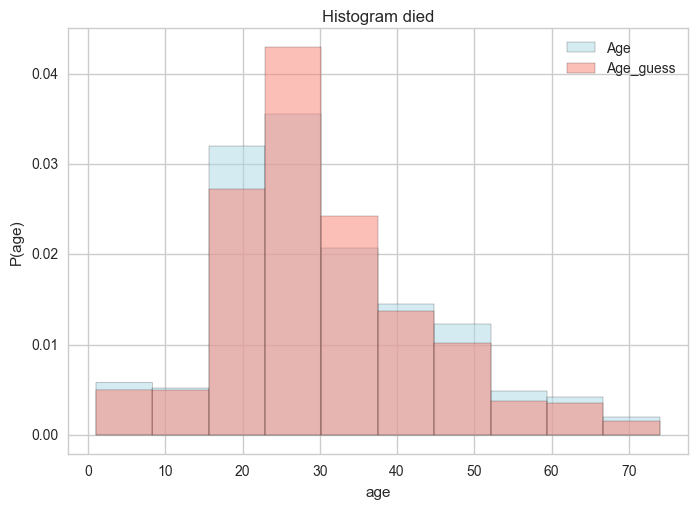

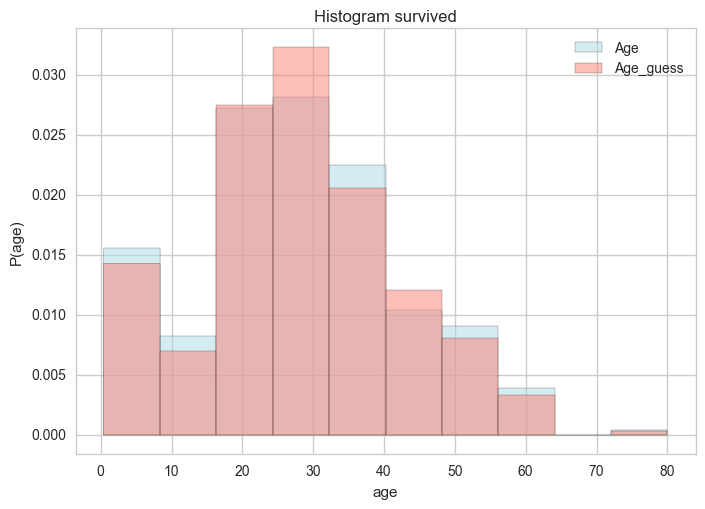

In [46]:
#plot a histogram of the ages compared to the guesses
#first make the data
data_tmp = pd.concat([data.loc[0:n_train-1],labels],axis=1)
x = data_tmp[data_tmp["Survived"]==0] # data for died
y = data_tmp[data_tmp["Survived"]==1] # data for survived

#plot the histograms for those who died
fig1, ax1 = plt.subplots()
ax1.hist(x.Age[x.Age.notnull()].values, normed = True,  color='lightblue', alpha=0.5, label='Age')
ax1.hist(x.Age_guess.values, normed = True,  color='salmon', alpha=0.5, label='Age_guess')
ax1.set(title='Histogram died', ylabel='P(age)', xlabel='age')
ax1.margins(0.05)
ax1.legend(loc='upper right')

#plot the histograms for those who survived
fig2, ax2 = plt.subplots()
ax2.hist(y.Age[y.Age.notnull()].values, normed = True,  color='lightblue', alpha=0.5, label='Age')
ax2.hist(y.Age_guess.values, normed = True,  color='salmon', alpha=0.5, label='Age_guess')
ax2.set(title='Histogram survived', ylabel='P(age)', xlabel='age')
ax2.margins(0.05)
ax2.legend(loc='upper right')

#show the plots
plt.show()

The histograms are pretty close to one another, so we can use Age_guess as a feature.

We will now plot the survival rates for different ages, the total and against different classes and against sex

All passengers


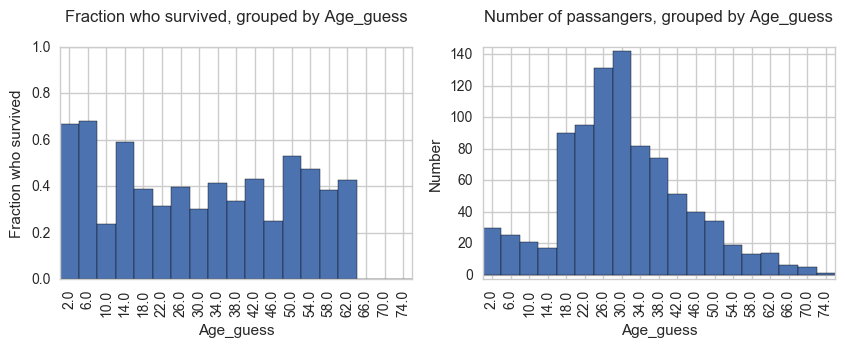


First class passengers


//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in true_divide
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in true_divide


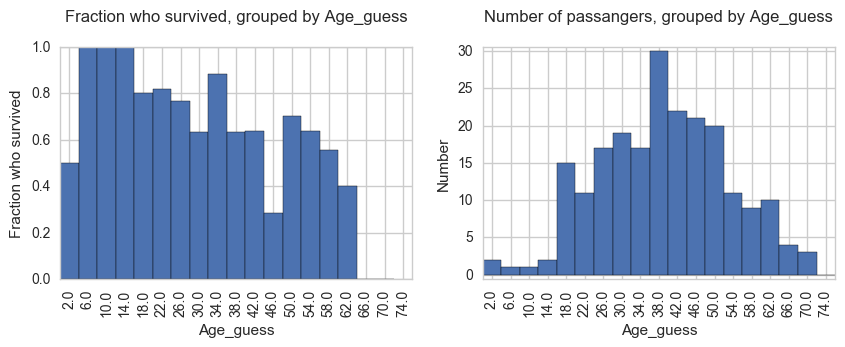


Second class passengers


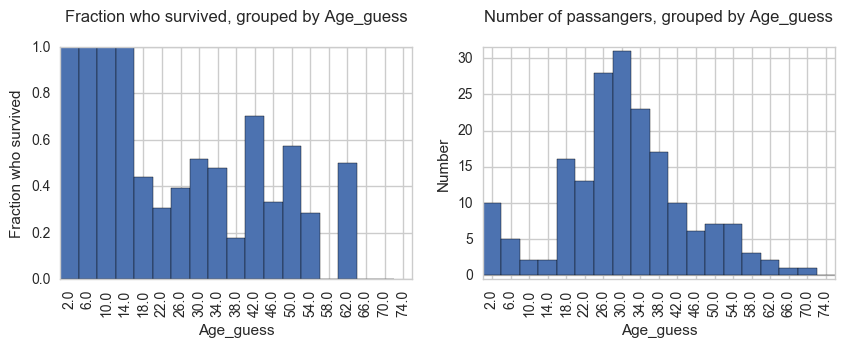


Third class passengers


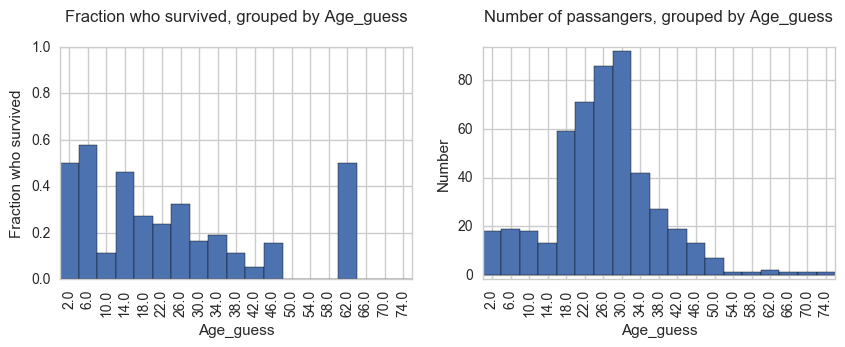


Male passengers


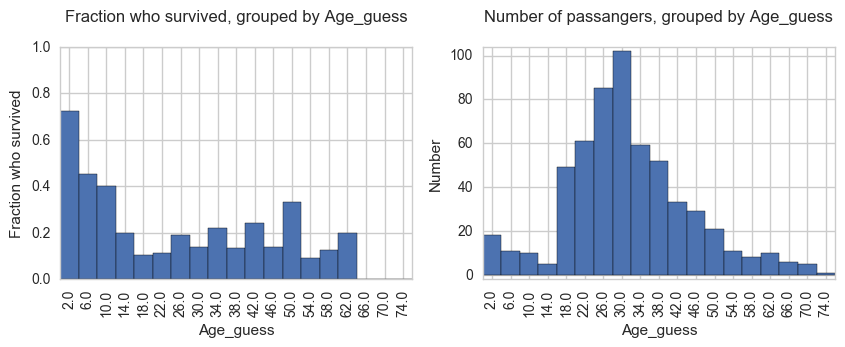


Female passengers


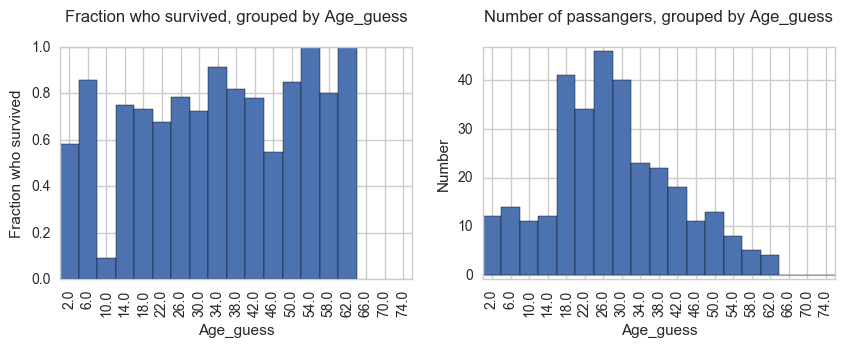

In [47]:
#make bins
bins = np.arange(0,80,4)
#plot
print("All passengers")
plot_hist_frac(data.iloc[0:n_train,:], "Age_guess", labels, bins)
print("")
print("First class passengers")
plot_hist_frac(data.ix[data.Pclass == 1].iloc[0:n_train,:], "Age_guess", labels.ix[data.Pclass == 1], bins)
print("")
print("Second class passengers")
plot_hist_frac(data.ix[data.Pclass == 2].iloc[0:n_train,:], "Age_guess", labels.ix[data.Pclass == 2], bins)
print("")
print("Third class passengers")
plot_hist_frac(data.ix[data.Pclass == 3].iloc[0:n_train,:], "Age_guess", labels.ix[data.Pclass == 3], bins)
print("")
print("Male passengers")
plot_hist_frac(data.ix[data.Sex == 0].iloc[0:n_train,:], "Age_guess", labels.ix[data.Sex == 0], bins)
print("")
print("Female passengers")
plot_hist_frac(data.ix[data.Sex == 1].iloc[0:n_train,:], "Age_guess", labels.ix[data.Sex == 1], bins)

The very young survive (younger than 8), then it gets hard to tell, and then the very old (> 64) seem to have a high chance of dying (not much data for this, but it figures that the old would struggle in the cold).

Also, it is very different depending on class and sex. Options are to either leave this as a continuous variable, or make age bins for each class and gender. Since that makes it very complex (and bin boundaries are subjective), we shall leave this as a continuous variable.


Finally there is the cabin information: the first letter of the cabin number gives us the level the cabin was on.

We we also take the number of cabins as a feature (ore than one cabin can mean e.g. rich, or a large family). Unlike Age, there are a lot of unkowns for this, so we will set those to 0. This is based on the assumption that it cabin numbers are more likely to be known for upper class passengers, hence any other inference will be skewed (and then we can also see if having unknown cabin numbers is a useful feature).

In [48]:
def make_cabin_features(df, features):
    df.ix[df['Cabin'].notnull(),'N_Cabins']=df.Cabin.str.count(' ')+1.0
    df.ix[df['Cabin'].isnull(),'N_Cabins'] = 0.0
    df['Cabin_letter'] = df.Cabin.astype(str).str[0]
    return df

In [49]:
data = make_cabin_features(data, features)
data = make_str_ints(data, "Cabin_letter", labels)
print(data.N_Cabins.head())

0    0.0
1    1.0
2    0.0
3    1.0
4    0.0
Name: N_Cabins, dtype: float64


Now we see how these affect the survival rate

Survived    0    1  All
N_Cabins               
0.0       481  206  687
1.0        58  122  180
2.0         7    9   16
3.0         3    3    6
4.0         0    2    2
All       549  342  891


Survived         0         1
N_Cabins                    
4.0       0.000000  1.000000
1.0       0.322222  0.677778
2.0       0.437500  0.562500
3.0       0.500000  0.500000
0.0       0.700146  0.299854


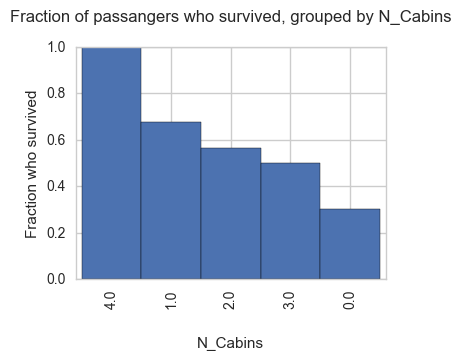

Survived        0    1  All
Cabin_letter               
0               1    0    1
1             481  206  687
2               8    7   15
3               2    2    4
4              24   35   59
5               5    8   13
6              12   35   47
7               8   24   32
8               8   25   33
All           549  342  891


Survived             0         1
Cabin_letter                    
8             0.242424  0.757576
7             0.250000  0.750000
6             0.255319  0.744681
5             0.384615  0.615385
4             0.406780  0.593220
3             0.500000  0.500000
2             0.533333  0.466667
1             0.700146  0.299854
0             1.000000  0.000000


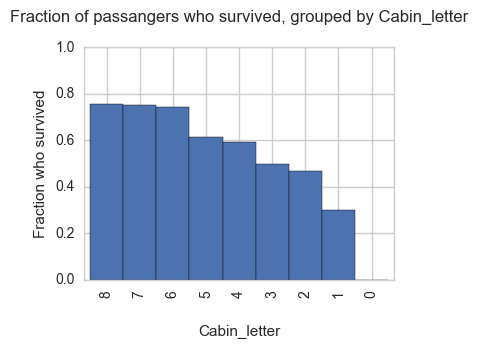

In [50]:
#cross tabulate the title with survival
cross_tab_frac(data.iloc[0:n_train,:], "N_Cabins", labels)
#cross tabulate the title with survival
cross_tab_frac(data.iloc[0:n_train,:], "Cabin_letter", labels)

These seem to be quite useful features ...

Now see what we have as columns

In [51]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 19 columns):
PassengerId     1309 non-null int64
Pclass          1309 non-null int64
Name            1309 non-null object
Sex             1309 non-null int64
Age             1046 non-null float64
SibSp           1309 non-null int64
Parch           1309 non-null int64
Ticket          1309 non-null object
Fare            1309 non-null float64
Cabin           295 non-null object
Embarked        1309 non-null float64
Fam_size        1309 non-null int64
Fam_type        1309 non-null int64
Title           1309 non-null int64
Name_len        1309 non-null int64
Name_cat        1309 non-null int64
Age_guess       1309 non-null float64
N_Cabins        1309 non-null float64
Cabin_letter    1309 non-null int64
dtypes: float64(5), int64(11), object(3)
memory usage: 194.4+ KB
None


Drop the features we do not need

In [52]:
print(data.columns)
data.drop('PassengerId', 1, inplace=True)
data.drop('Name', 1, inplace=True)
data.drop('Age', 1, inplace=True)
data.drop('Cabin', 1, inplace=True)
data.drop('Ticket', 1, inplace=True)
print(data.columns)
print(len(data.columns))

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Fam_size', 'Fam_type', 'Title',
       'Name_len', 'Name_cat', 'Age_guess', 'N_Cabins', 'Cabin_letter'],
      dtype='object')
Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Fam_size',
       'Fam_type', 'Title', 'Name_len', 'Name_cat', 'Age_guess', 'N_Cabins',
       'Cabin_letter'],
      dtype='object')
14


Make new data frames for the test and train data, and output them to new csv files

In [53]:
df_train_out = pd.concat([data.iloc[0:n_train],labels],axis=1)
df_test_out = data.iloc[n_train:]

In [54]:
df_train_out.to_csv("train_processed.csv",  index = False)
df_test_out.to_csv("test_processed.csv",  index = False)